In [6]:
import os
from dataset import ScaperLoader
import json
from torch.utils.data import sampler, DataLoader
import time
import sys
import matplotlib.pyplot as plt
%matplotlib inline

run_directory = '/pipeline/pipelines/rnn-music-baseline/runs/run9/'

saved_model_path = os.path.join(run_directory, 'checkpoints/latest_best.h5')
print(saved_model_path)
with open(os.path.join(run_directory, 'params.json'), 'r') as f:
    params = json.load(f)
    

val_dataset = ScaperLoader(folder='/pipeline/data/generated/musdb/validation/', 
                           length=1.0, 
                           n_fft=params['n_fft'], 
                           hop_length=params['hop_length'], 
                           output_type=params['target_type'],
                           group_sources=params['group_sources'],
                           ignore_sources=params['ignore_sources'],
                           source_labels=params['source_labels'])

sample_strategy = sampler.SequentialSampler(val_dataset)    
dataloader = DataLoader(val_dataset, batch_size=params['batch_size'], num_workers=params['num_workers'], sampler=sample_strategy)

/pipeline/pipelines/rnn-music-baseline/runs/run9/checkpoints/latest_best.h5


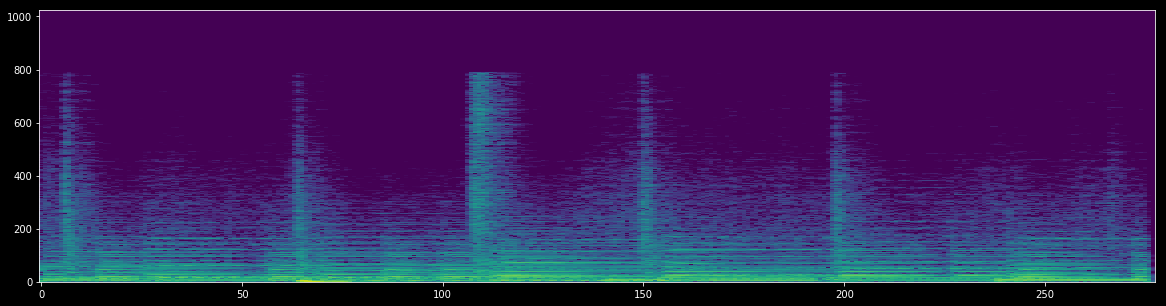

Mixture


Source 0


Source 1


Source 2


Source 3


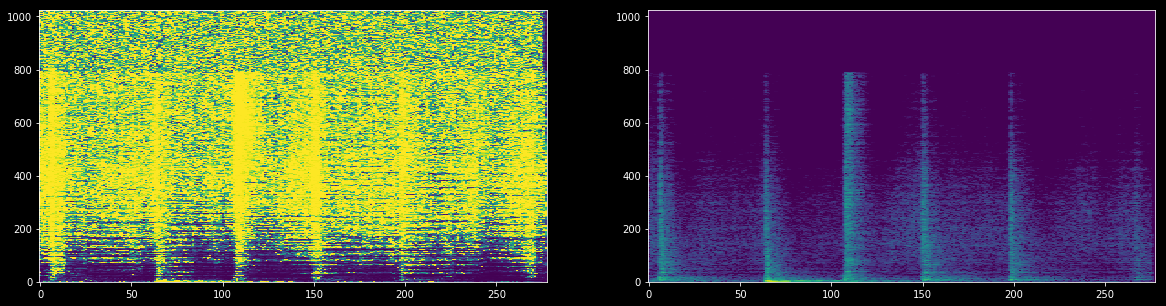

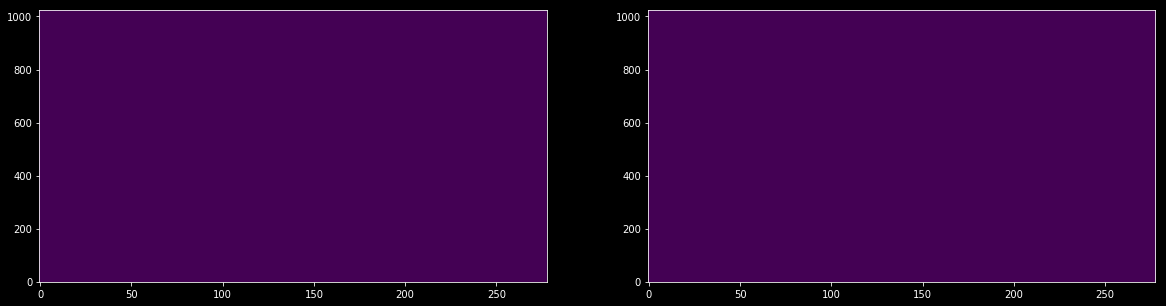

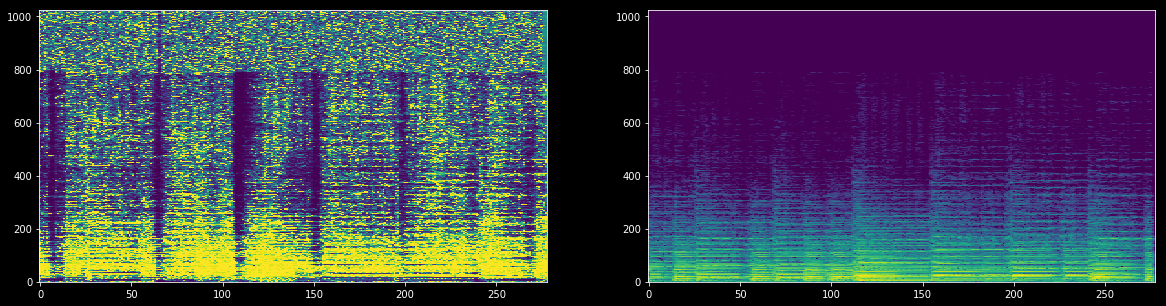

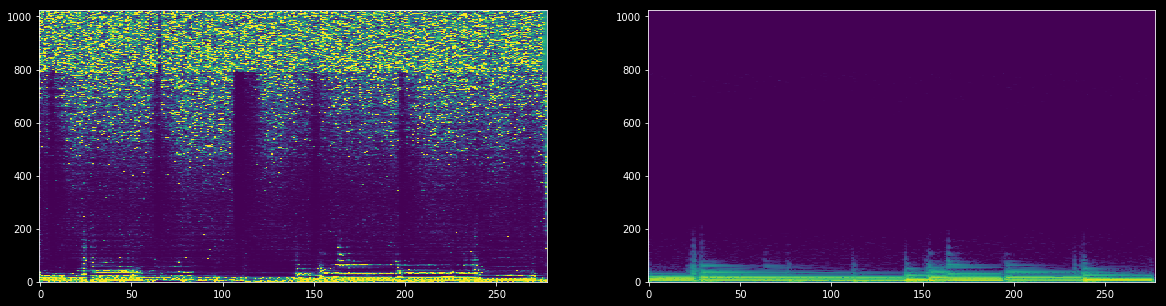

In [7]:
val_dataset.inspect(0)

In [8]:
def traverse_dataloader(dataloader):
    start_time = time.time()
    i = 0
    for (spectrogram, magnitude_spectrogram, source_spectrograms, source_ibms, one_hots) in dataloader:
        sys.stdout.write('\r'+str(i))
        i += 1
        if i > 100:
            break
    end_time = time.time()
    duration = end_time - start_time
    print(duration)

In [9]:
traverse_dataloader(dataloader)

9968.8560528755188
